In [3]:
import sys
sys.path.append("..")
from __models.DCGAN import Generator as DCGAN_G
from __models.WGANGP import Generator as WGAN_GP_G
from __models.WGANDIV import Generator as WGAN_DIV_G
from __models.SNGAN import Enlarged_Generator as SNGAN_G
from __models.SNGAN_ResNet import ResNet_Generator as SNGAN_Enhanced_G
from __models.VAEGAN import VariationalAutoEncoder as VAE_GAN_G
sys.path.remove("..")

In [4]:
import torch
from functions import calc_MSE, calc_SSIM, find_most_similar_img
from functions import Imagefolder
from functions import show_img, save_tensor_as_img, img_to_grid_save
from functions import weight_init, reset_grad
from functions import plot_line_graph
from functions import find_key

In [5]:
def fast_SAR_generation(dpi=150):
    
    print('Model List [ 0:DCGAN, 1:WGAN-GP, 2:WGAN-DIV, 3:SNGAN, 4:SNGAN(Enhanced), 5:VAE-GAN ]')
    n_model = int(input('Please enter the model number: '))
    print('SAR Image Category List [ 0:2S1, 1:BMP2, 2:BRDM2, 3:BTR60, 4:BTR70, 5:D7, 6:T62, 7:T72, 8:ZIL131, 9:ZSU234 ]')
    n_category = int(input('Please enter the category number: '))
    n_img = int(input('Please enter how many number of images to be generated: '))
    
    model_list = ['DCGAN','WGAN-GP','WGAN-DIV','SNGAN','SNGAN(Enhanced)','VAE-GAN']
    if n_model == 0:
        netG = DCGAN_G().cuda()
        state_dict = torch.load('../_Pretrained_Weights/DCGAN_Generator.ckpt')
    elif n_model == 1:
        netG = WGAN_GP_G().cuda()
        state_dict = torch.load('../_Pretrained_Weights/WGAN-GP_Generator.ckpt')
    elif n_model == 2:
        netG = WGAN_DIV_G().cuda()
        state_dict = torch.load('../_Pretrained_Weights/WGAN-DIV_Generator.ckpt')
    elif n_model == 3:
        netG = SNGAN_G().cuda()
        state_dict = torch.load('../_Pretrained_Weights/SNGAN_Generator.ckpt')
    elif n_model == 4:
        netG = SNGAN_Enhanced_G().cuda()
        state_dict = torch.load('../_Pretrained_Weights/SNGAN(Enhanced)_Generator.ckpt')
    elif n_model == 5:
        netG = VAE_GAN_G(latent_dims=32).cuda()
        state_dict = torch.load('../_Pretrained_Weights/VAE-GAN_Generator.ckpt')
    else:
        print('Please enter a valid model number')
        
    category_list = ['2S1','BMP2','BRDM2','BTR60','BTR70','D7','T62','T72','ZIL131','ZSU234']
    netG.load_state_dict(state_dict[category_list[n_category]])
    
    print('Generate %d %s images from %s' %(n_img, category_list[n_category], model_list[n_model]))
    
    if n_model == 5:
        latent_noise = torch.randn(n_img, 32).cuda()
        img = netG.decoder(latent_noise)
        show_img(img, normalize=True, dpi=dpi)
    else:
        latent_noise = torch.randn(n_img, 256, 1, 1).cuda()
        img = netG(latent_noise)
        show_img(img, normalize=True, dpi=dpi)
        
    torch.cuda.empty_cache()

Model List [ 0:DCGAN, 1:WGAN-GP, 2:WGAN-DIV, 3:SNGAN, 4:SNGAN(Enhanced), 5:VAE-GAN ]


Please enter the model number:  2


SAR Image Category List [ 0:2S1, 1:BMP2, 2:BRDM2, 3:BTR60, 4:BTR70, 5:D7, 6:T62, 7:T72, 8:ZIL131, 9:ZSU234 ]


Please enter the category number:  2
Please enter how many number of images to be generated:  16


Generate 16 BRDM2 images from WGAN-DIV


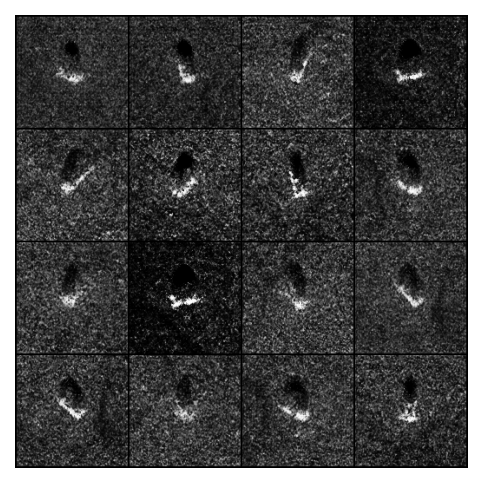

In [6]:
fast_SAR_generation()